# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Marsella Vindriani
- **Email:** marcelavind61@gmail.com
- **ID Dicoding:** marsella_vind

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren sewa sepeda pada dari tahun 2011 hingga 2012?
- Pertanyaan 2 : Bagaimana pola sewa sepeda tiap musim?
- Pertanyaan 3 : Bagaimana perbandingan sewa sepeda pada hari libur dan hari kerja?

## Import Semua Packages/Library yang Digunakan

mengimport library yang akan digunakan pada proses analisis data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Saya melakukan proses Data Wrangling yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data

### Gathering Data

Pada proses ini saya mengumpulkan ada apa saja yang akan saya analisis

In [36]:
day_df = pd.read_csv('data\day.csv')
hour_df = pd.read_csv('data\hour.csv')

melihat isi dari data dalam bentuk dataframe

In [37]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengetahui jumlah fitur dan rekaman yang ada pada data

In [38]:
day_df.shape

(731, 16)

In [39]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
hour_df.shape

(17379, 17)

**Kedua dataset day.csv dan hour.csv memiliki kesamaan isi data, namun fitur hr hanya terdapat pada dataset hour.csv. jadi saya cukup mengambil dataset hour.csv yang sudah lengkap untuk dilakukan analisis**

In [41]:
df = hour_df

melihat ukuran data

In [42]:
df.shape

(17379, 17)

**Insight:**
- dataset memiliki 17 fitur dan 17379 rekaman
- adapun fitur yang terdapat pada dataset ini antara lain :
  

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

Pada tahap Assessing Data, saya melakukan penilaian terhadap data. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll

menampilkan info statistik dataset

In [43]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


info tipe data tiap fitur dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


melihat apakah ada data yang NaN atau Null

In [45]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


melihat apakah ada data yang duplikat

In [46]:
df.duplicated().sum()

0

melihat ada data unik apa saja pada setiap fitur

In [47]:
df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Insight:**
- tidak ada nilai Null dan Nan pada dataset
- tidak ada data duplikat

### Cleaning Data

Pada tahap ini, saya membersihkan data dari nilai-nilai yang hilang, duplikat, dan anomali. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut

Mengubah angka menjadi keterangan pada fitur mnth, season, weatersit, yr, workingday

In [48]:
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df['weathersit'] = df['weathersit'].map({1: 'Clear/Partly Cloudy',2: 'Misty/Cloudy',3: 'Light Snow/Rain',4: 'Severe Weather'})
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})
df['workingday'] = df['workingday'].map({0: 'Holiday', 1: 'Workingday'})

Mengubah tipe data ke categorical

In [49]:
df['season'] = df.season.astype('object')
df['yr'] = df.yr.astype('object')
df['mnth'] = df.mnth.astype('object')
df['hr'] = df.hr.astype('object')
df['holiday'] = df.holiday.astype('object')
df['weekday'] = df.weekday.astype('object')
df['workingday'] = df.workingday.astype('object')
df['weathersit'] = df.weathersit.astype('object')

mengubah tipedata dteday menjadi datetime

In [50]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  object        
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- data sudah bersih dari Null dan NaN
- semua fitur telah memiliki tipe data yang sesuai

## Exploratory Data Analysis (EDA)

Exploratory data Analysis (EDA) merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis. Pada prosesnya, akan sering menggunakan berbagai teknik dan parameter dalam descriptive statistik yang bertujuan untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah. Selain itu, juga menggunakan visualisasi data untuk menemukan pola dan memvalidasi parameter descriptive statistik yang diperoleh

### Explore data

Melihat parameter Statistik untuk data numerik

In [52]:
df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


melihat histogram masing-masing fitur

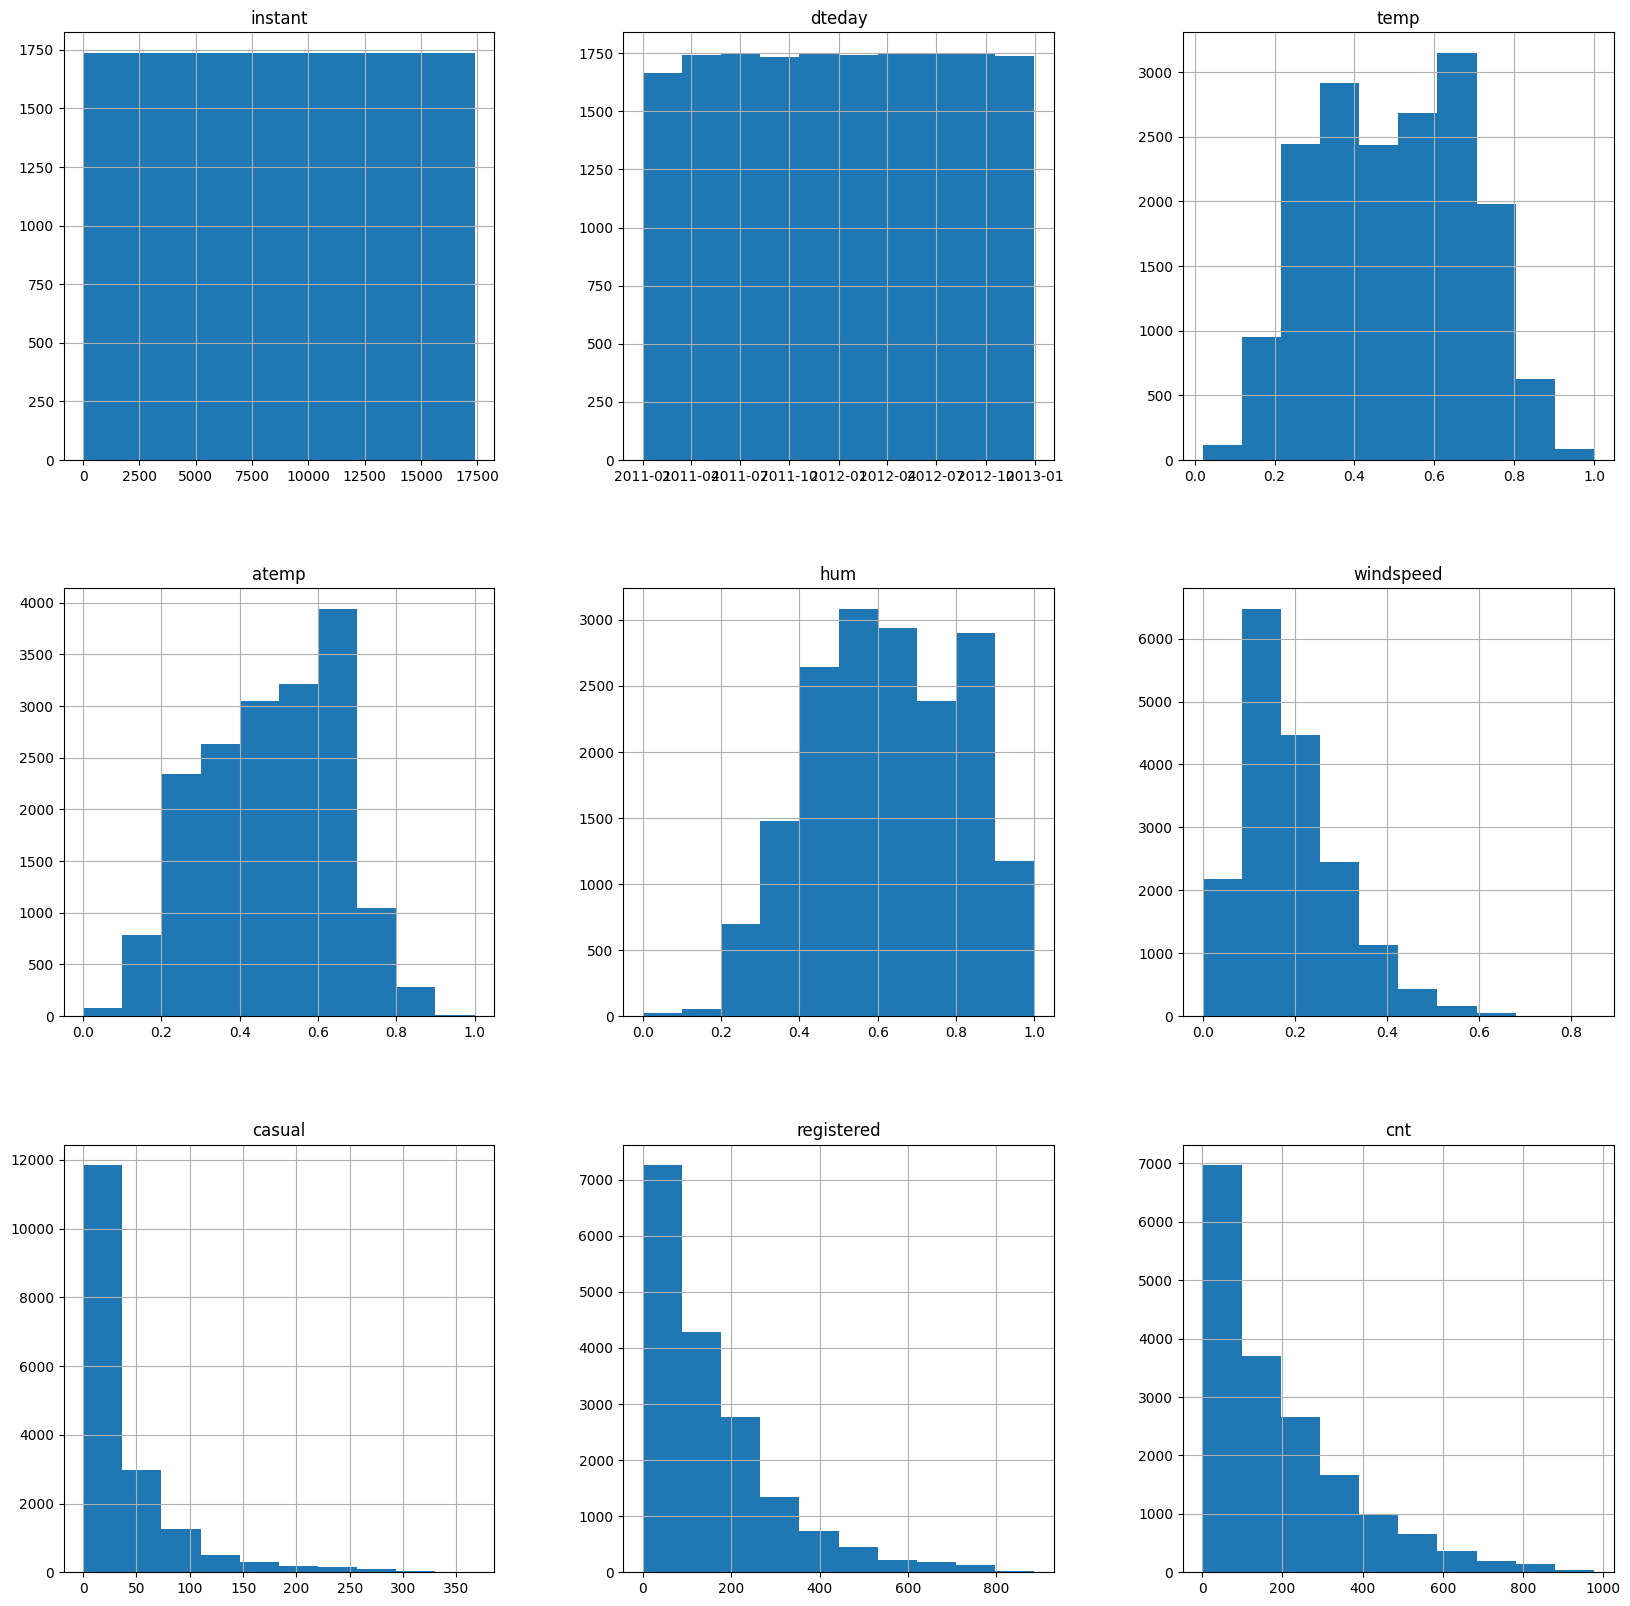

In [53]:
df.hist(figsize=(20,20))
plt.show()

melihat korelasi tiap fitur dengan heatmap


<Axes: >

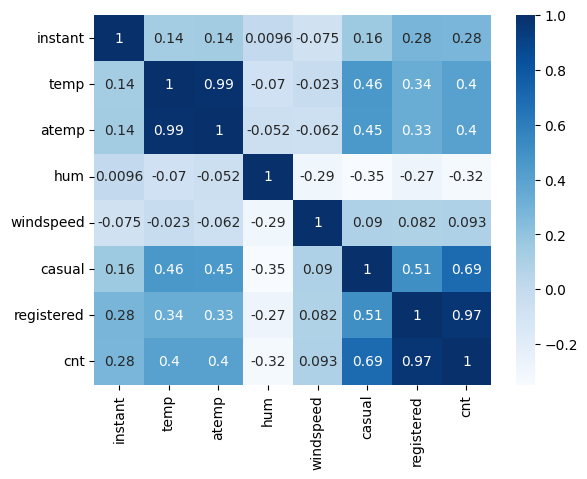

In [54]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap="Blues", annot=True)

**Setelah melihat korelasi tiap fitur, disini terlihat bahwa target adalah cnt dan cnt memiliki nilai korelasi yang tinggi dengan fitur lainnya antara lain : registered,casual, dan temp**

melihat trend sewa sepeda dari tahun ke tahun

In [55]:
tren = df.groupby(by='yr').agg({'cnt': 'mean'})
tren.head(2)

,cnt
yr,
2011,143.794448
2012,234.666361


melihat statistik banyaknya penyewa sepeda berdasarkan musim dengan parameter registered dan cnt

In [56]:
df.groupby('season').agg({'casual': 'mean','registered': 'mean','cnt': ['max', 'min', 'mean']}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])

casual  registered  cnt                
             mean        mean  max min        mean
season                                            
Spring  14.290901   96.823668  801   1  111.114569
Summer  46.160581  162.183488  957   1  208.344069
Fall    50.287144  185.729093  977   1  236.016237
Winter  30.666824  168.202032  967   1  198.868856

melihat statistik penyewa sepeda berdasarkan hari dengan parameter cnt

In [57]:
df.groupby(by='weekday').agg({'cnt':['max','min','mean']}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

cnt                
         max min        mean
weekday                     
Sun      776   1  177.468825
Mon      968   1  183.744655
Tue      970   1  191.238891
Wed      977   1  191.130505
Thu      976   1  196.436665
Fri      957   1  196.135907
Sat      783   1  190.209793

**Insight:**
- terdapat korelasi yang besar antara cnt dengan registered, dan cnt dengan casual
- mengetahui tren rental sepeda berdasarkan tahun
- mengetahui pada musim apa rental sepeda meningkat
- mengetahui pada hari apa rental sepeda meningkat

## Visualization & Explanatory Analysis

Pada tahap Visualization, kita akan menerapkan berbagai teknik dan jenis visualisasi data yang tepat untuk mengomunikasikan temuan atau insight dari hasil analisis secara efektif.

Pada proses explanatory analysis, visualisasi data digunakan sebagai media untuk menyampaikan pesan atau story dari sebuah data. Oleh karena itu, harus menyampaikan informasi terkait konteks dari sebuah visualisasi data yang bertujuan agar pembaca mengetahui tujuan dari visualisasi data yang dibuat.

### Pertanyaan 1:Bagaimana tren sewa sepeda pada tahun ini?

Saya menggunakan linechart dengan parameter bulan dan cnt berdasarkan tahun untuk melihat perkembangan tren sewa sepeda. Dimana xlabel adalah bulan, ylabel adalah cnt, serta hue adalah year. Didapatlah bahwa Grafik menunjukkan tren sewa sepeda bulanan selama 2 tahun terakhir. Terlihat adanya peningkatan sewa sepeda setiap pertengahan tahun dan mengalami penurunan ketika mendekati akhir tahun.

<ipython-input-58-23ab174d796f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df.groupby(by=["mnth","yr"]).agg({"cnt": "sum"}).reset_index()


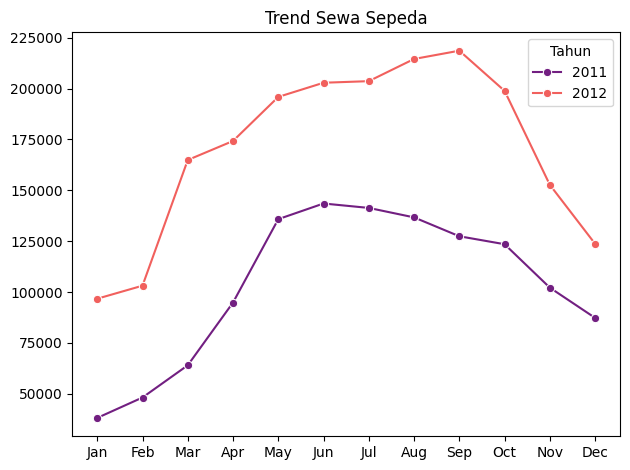

In [58]:
df['mnth'] = pd.Categorical(df['mnth'], categories= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)
monthly_counts = df.groupby(by=["mnth","yr"]).agg({"cnt": "sum"}).reset_index()
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="magma", marker="o")

plt.title("Trend Sewa Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Bagaimana pola sewa sepeda tiap musim?

Saya menggunakan bar chart untuk melihat banyaknya penyewa sepeda baik dengan label registered dan casual pada setiap musim.

Pada grafik ini terlihat jumlah penyewa sepeda paling banyak ada di musim gugur dan musim panas.

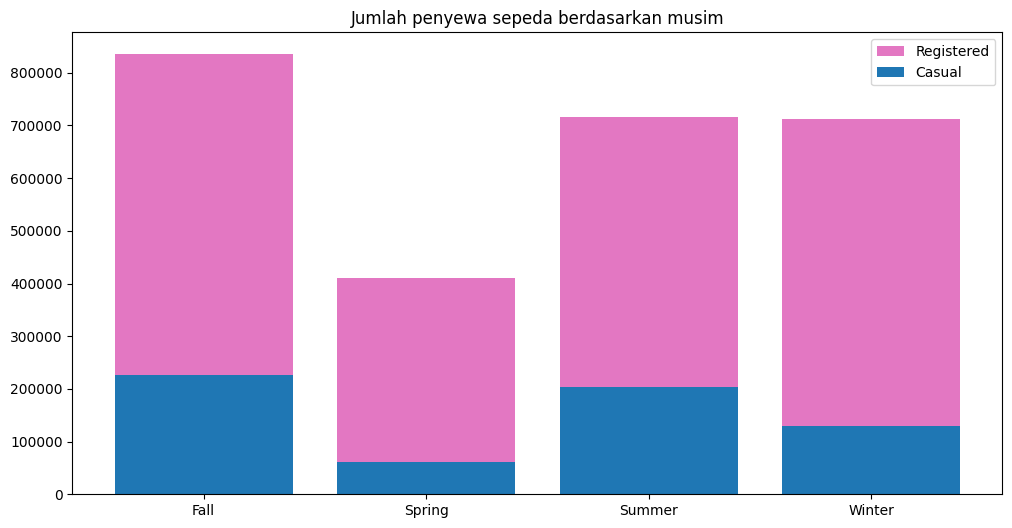

In [59]:
pola_musim = df.groupby('season')[['registered', 'casual']].sum().reset_index()
urutan_musim = ['spring', 'summer', 'fall', 'winter']
plt.figure(figsize=(12, 6))
plt.bar(pola_musim['season'], pola_musim['registered'], label='Registered', color='tab:pink')
plt.bar(pola_musim['season'], pola_musim['casual'], label='Casual', color='tab:blue')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

Saya menggunakan scatter plot untuk melakukan visualisasi persebaran jumlah sewa sepeda terhadap suhu. Kita juga dapat melihat korelasi antara banyaknya penyewa dengan temperatur suhu yang menunjukkan kesimpulan yang sama yaitu pada musim gugur dan musim panas jumlah penyewa meningkat.

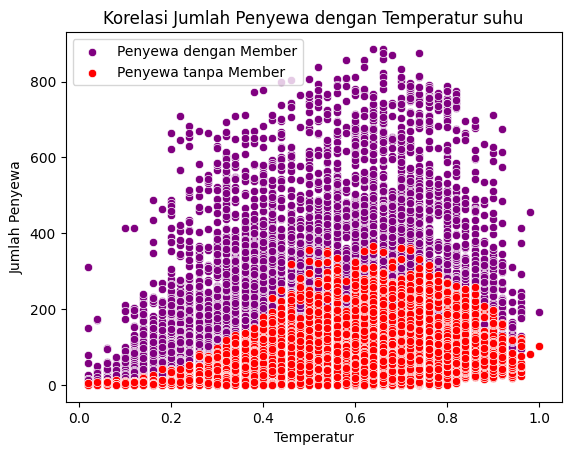

In [60]:
sns.scatterplot(x='temp',y='registered',data=df, label='Penyewa dengan Member', color='purple')
sns.scatterplot(x='temp',y='casual',data=df, label='Penyewa tanpa Member', color='red')
plt.title('Korelasi Jumlah Penyewa dengan Temperatur suhu')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewa')

plt.legend()
plt.show()

## Pertanyaan 3 : Bagaimana perbandingan sewa sepeda pada hari libur dan hari kerja?

Saya menggunakan clustered bar chart untuk melihat perbandingan jumlah penyewa sepeda pada hari kerja san hari libur. Pada Chart ini terlihat bahwa pada hari kerja jumlah sewa sepeda meningkat. Hal ini menunjukkan bahwa para penyewa sepeda menggunakan sepeda untuk beraktivitas sehari-hari seperti pergi ke kantor, ke sekolah, serta berbelanja kebutuhan sehari-hari

<ipython-input-61-f5f86f839425>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df, palette=['blue', 'red'])


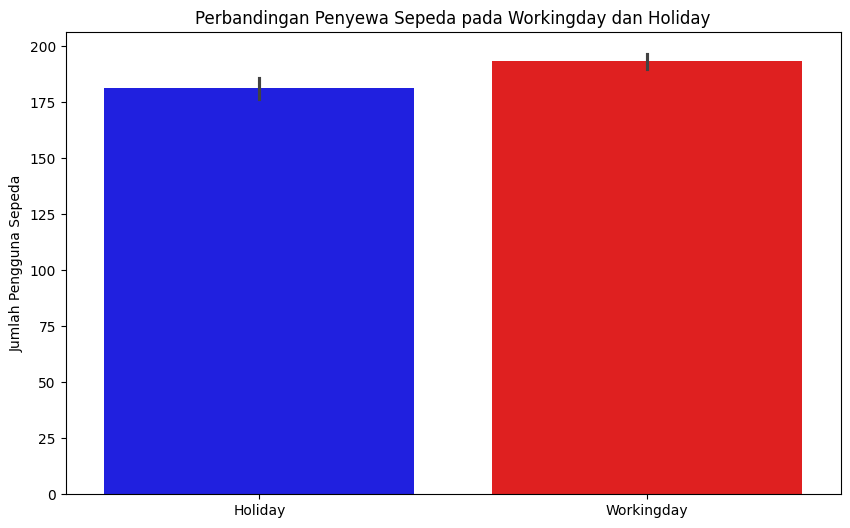

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='workingday', y='cnt', data=df, palette=['blue', 'red'])

plt.title('Perbandingan Penyewa Sepeda pada Workingday dan Holiday')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**
- tren sewa sepeda meningkat dari tahun 2011 ke tahun 2012
- musim panas dan musim gugur adalah musim yang paling banyak sepeda disewa
- pada hari kerja jumlah penyewa sepeda lebih banyak

## Conclusion

**Conclution pertanyaan 1 : Bagaimana tren sewa sepeda dari tahun 2011 hingga 2012??**
Tren sewa sepeda meningkat di tahun 2011 hingga 2012. Sewa sepeda meningkat pada bulan Mei dan puncaknya pada bulan September, namun menurun pada Oktober hingga Desember

**Conclution pertanyaan 2 : Bagaimana pola sewa sepeda tiap musim?**
Pola sewa sepeda berdasarkan musim meningkat sedikit demi sedikit setiap musimnya. Dimulai dari musim semi yang menunjukkan jumlah sewa sepeda paling sedikit. Kemudian meningkat pada musim panas dan musim gugur sebagai musim dengan sewa sepeda terbanyak. Kemudian sewa sepeda sedikit menurun di musim dingin.

**Conclution pertanyaan 3 : Bagaimana perbandingan sewa sepeda pada hari libur dan hari kerja?**
Jumlah sewa sepeda paling banyak terjadi pada hari kerja. Hal ini menunjukkan bahwa penyewa menggunakan sepeda untuk kegiatan sehari-hari seperti bekerja, sekolah, membeli bahan makanan dan kegiatan lainnya.

In [62]:
df.to_csv("main_data.csv", index=False)